# ESA WorldCereal

* **Products used:** 
[WorldCereal Temporary Cropland Extent 2021 (raster 10 m), annual – version 1](https://explorer.digitalearth.africa/products/esa_worldcereal_temporarycrops),
[WorldCereal Active Cropland 2021 (raster 10 m), seasonal – version 1](https://explorer.digitalearth.africa/products/esa_worldcereal_activecropland),
[WorldCereal Maize – Main Season 2021 (raster 10 m), seasonal – version 1](https://explorer.digitalearth.africa/products/esa_worldcereal_maize_main),
[WorldCereal Maize – Active Season 2021 (raster 10 m), seasonal – version 1](https://explorer.digitalearth.africa/products/esa_worldcereal_maize_active),
[WorldCereal Maize – Irrigation 2021 (raster 10 m), seasonal – version 1](https://explorer.digitalearth.africa/products/esa_worldcereal_maize_irrigation),
[WorldCereal Winter Cereals 2021 (raster 10 m), seasonal – version 1](https://explorer.digitalearth.africa/products/esa_worldcereal_wintercereals),
[WorldCereal Winter Cereals – Irrigation 2021 (raster 10 m), seasonal – version 1](https://explorer.digitalearth.africa/products/esa_worldcereal_wintercereals_irrigation)

## Background

The ESA WorldCereal project delivers a globally consistent, satellite-derived system for monitoring cropland extent, crop types, and irrigation practices. Designed for seasonal agricultural monitoring at 10-meter resolution, the system uses optical and radar data from Sentinel-1 SAR and Sentinel-2 MSI, enabling high-frequency, cloud-resilient observations across diverse agro-ecological zones. The initiative builds on earlier prototyping efforts and now provides a fully open-source, harmonized processing system (European Space Agency [ESA], 2025).

Key outputs include annual temporary cropland extent, seasonal crop type classifications (e.g., cereals and maize), irrigation status, and associated confidence layers. These products are available globally but are particularly relevant for regions with food security challenges, such as sub-Saharan Africa and South Asia. Products are mapped using agro-ecological zones to account for regional planting calendars, and the system supports the co-creation of customized models using user-supplied in-situ reference data.

All maps are provided in standardized spatial grids (EPSG:4326), with versioned outputs and quality metrics validated against ground observations. The platform also includes a global reference data module, enabling the sharing, curation, and retrieval of harmonized crop ground-truth data. Ongoing improvements in model training, algorithm optimization, and atmospheric correction enhance product accuracy and usability over time.

Digital Earth Africa (DE Africa) hosts these datasets for the African region, providing free and open access to the data. This notebook demonstrates how to load the WorldCereal datasets into the DE Africa Sandbox environment.

<h4><strong>Summary Table</strong></h4>

<table>
  <thead>
    <tr>
      <th style="text-align:center;">Product Code</th>
      <th style="text-align:center;">Spatial Resolution</th>
      <th style="text-align:center;">Time Period</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align:center;">esa_worldcereal_temporarycrops</td>
      <td style="text-align:center;">10 m</td>
      <td style="text-align:center;">2021</td>
    </tr>
    <tr>
      <td style="text-align:center;">esa_worldcereal_activecropland</td>
      <td style="text-align:center;">10 m</td>
      <td style="text-align:center;">2021</td>
    </tr>
    <tr>
      <td style="text-align:center;">esa_worldcereal_maize_main</td>
      <td style="text-align:center;">10 m</td>
      <td style="text-align:center;">2021</td>
    </tr>
    <tr>
      <td style="text-align:center;">esa_worldcereal_maize_active</td>
      <td style="text-align:center;">10 m</td>
      <td style="text-align:center;">2021</td>
    </tr>
    <tr>
      <td style="text-align:center;">esa_worldcereal_maize_irrigation</td>
      <td style="text-align:center;">10 m</td>
      <td style="text-align:center;">2021</td>
    </tr>
    <tr>
      <td style="text-align:center;">esa_worldcereal_wintercereals</td>
      <td style="text-align:center;">10 m</td>
      <td style="text-align:center;">2021</td>
    </tr>
    <tr>
      <td style="text-align:center;">esa_worldcereal_wintercereals_irrigation</td>
      <td style="text-align:center;">10 m</td>
      <td style="text-align:center;">2021</td>
    </tr>
  </tbody>
</table>


**Measurement**

| Measurement                         | Temporary Cropland (`temporarycrops`) | Active Cropland (`activecropland`) | Maize Main (`maize_main`) | Maize Irrigation (`maize_irrigation`) | Winter Cereals (`wintercereals`) | Winter Cereals Irrigation (`wintercereals_irrigation`) |
| ----------------------------------- | :-----------------------------------: | :--------------------------------: | :-----------------------: | :-----------------------------------: | :------------------------------: | :----------------------------------------------------: |
| **Binary Classification**           |                  Yes                  |                 Yes                |            Yes            |                  Yes                  |                Yes               |                           Yes                          |
| **Crop Type (Maize/Winter Cereal)** |                   No                  |                 No                 |            Yes            |                  Yes                  |                Yes               |                           Yes                          |
| **Irrigation Status**               |                   No                  |                 No                 |             No            |                  Yes                  |                No                |                           Yes                          |
| **Confidence Layer**                |                  Yes                  |                 Yes                |            Yes            |                  Yes                  |                Yes               |                           Yes                          |
| **Agro-Ecological Zone (AEZ) Mask** |                  Yes                  |                 Yes                |            Yes            |                  Yes                  |                Yes               |                           Yes                          |


## Description

In this notebook we will load `esa_worldcereal_****` data using `dc.load()` to return a map of lake water quality for a specified area.

Topics covered include:
1. Inspecting the `esa_worldcereal_***` product available in the datacube
2. Using the `dc.load()` function to load in each `esa_worldcereal_****` data
3. Plotting `esa_worldcereal_***`


***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages

In [1]:
%matplotlib inline



import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm
import geopandas as gpd
from odc.geo.geom import Geometry

import datacube
from deafrica_tools.plotting import display_map
from deafrica_tools.areaofinterest import define_area

### Connect to the datacube

In [2]:
dc = datacube.Datacube(app="WorldCereal")

## Analysis parameters

The following cell sets the parameters, which define the area of interest to conduct the analysis over.

### Select location
To define the area of interest, there are two methods available:

1. By specifying the latitude, longitude, and buffer, or separate latitude and longitude buffers, this method allows you to define an area of interest around a central point. You can input the central latitude, central longitude, and a buffer value in degrees to create a square area around the center point. For example, `lat = 10.338`, `lon = -1.055`, and `buffer = 0.1` will select an area with a radius of 0.1 square degrees around the point with coordinates `(10.338, -1.055)`. 
    
    Alternatively, you can provide separate buffer values for latitude and longitude for a rectangular area. For example, `lat = 10.338`, `lon = -1.055`, and `lat_buffer = 0.1` and`lon_buffer = 0.08` will select a rectangular area extending 0.1 degrees north and south, and 0.08 degrees east and west from the point `(10.338, -1.055)`.

   For reasonable loading times, set the buffer as `0.1` or lower.

3. By uploading a polygon as a `GeoJSON or Esri Shapefile`. If you choose this option, you will need to upload the geojson or ESRI shapefile into the Sandbox using Upload Files button <img align="top" src="../Supplementary_data/upload_files_icon.png"> in the top left corner of the Jupyter Notebook interface. ESRI shapefiles must be uploaded with all the related files `(.cpg, .dbf, .shp, .shx)`. Once uploaded, you can use the shapefile or geojson to define the area of interest. Remember to update the code to call the file you have uploaded.

To use one of these methods, you can uncomment the relevant line of code and comment out the other one. To comment out a line, add the `"#"` symbol before the code you want to comment out. By default, the first option which defines the location using latitude, longitude, and buffer is being used.

**If running the notebook for the first time**, keep the default settings below.
This will demonstrate how the analysis works and provide meaningful results.
The default location is an area with various land use and land cover types covering Mozambique and Malawi.

In [3]:
# Method 1: Specify the latitude, longitude, and buffer)
aoi = define_area(lat=-15.7764, lon=35.8923, buffer=0.5)

# Method 2: Use a polygon as a GeoJSON or Esri Shapefile. 
# aoi = define_area(vector_path='aoi.shp')

#Create a geopolygon and geodataframe of the area of interest
geopolygon = Geometry(aoi["features"][0]["geometry"], crs="epsg:4326")
geopolygon_gdf = gpd.GeoDataFrame(geometry=[geopolygon], crs=geopolygon.crs)

# Get the latitude and longitude range of the geopolygon
lats = (geopolygon_gdf.total_bounds[1], geopolygon_gdf.total_bounds[3])
lons = (geopolygon_gdf.total_bounds[0], geopolygon_gdf.total_bounds[2])

# Define the query
query = {
    'x': lons,
    'y': lats,
    'output_crs': 'epsg:6933',
}

In [4]:
# The code below renders a map that can be used to view the region.
display_map(lons, lats)

## Accessing WorldCereal Data Through DE Africa

### 1. Temporary Cropland Extent

The cell below demonstrates how to load the dataset using the `esa_worldcereal_temporarycrops` product code. Metadata Information can be found [here](https://explorer.digitalearth.africa/products/esa_worldcereal_temporarycrops). The most recent data from 2021 is used in this example. 

The dataset shows two layers: `classification` and `confidence`. The `classification` layer is a binary classification between temporary crops, which refers to crops grown in the relevant season, while the `confidence` layer indicates the confidence with which each pixel is classified _either_ as cropland on a percentage basis.

In [5]:
#load the data
esa_worldcereal_temporarycrops = dc.load(product='esa_worldcereal_temporarycrops',
                                measurements=['classification', 'confidence'],
                                resolution = (-10, 10),
                                time = ('2021'),
                                **query)

#Display the xrray dataset
esa_worldcereal_temporarycrops

<xarray.Dataset> Size: 237MB
Dimensions:         (time: 1, y: 12290, x: 9649)
Coordinates:
  * time            (time) datetime64[ns] 8B 2021-05-06T23:59:59.500000
  * y               (y) float64 98kB -1.926e+06 -1.926e+06 ... -2.049e+06
  * x               (x) float64 77kB 3.415e+06 3.415e+06 ... 3.511e+06 3.511e+06
    spatial_ref     int32 4B 6933
Data variables:
    classification  (time, y, x) uint8 119MB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    confidence      (time, y, x) uint8 119MB 73 73 73 73 81 ... 99 99 99 99 99
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

### Visualizing the Results

The cell below shows the `classification` and `confidence` layers for the area of interest. Comparing it to the reference image produced by the `display_map()` function above, we can see that areas covered by Lake Chilwa and the Mulanje Mountain Forest Reserve are classified as other land cover classes (non-crop) with high confidence and cropland is dispersed through other areas with varying confidence.

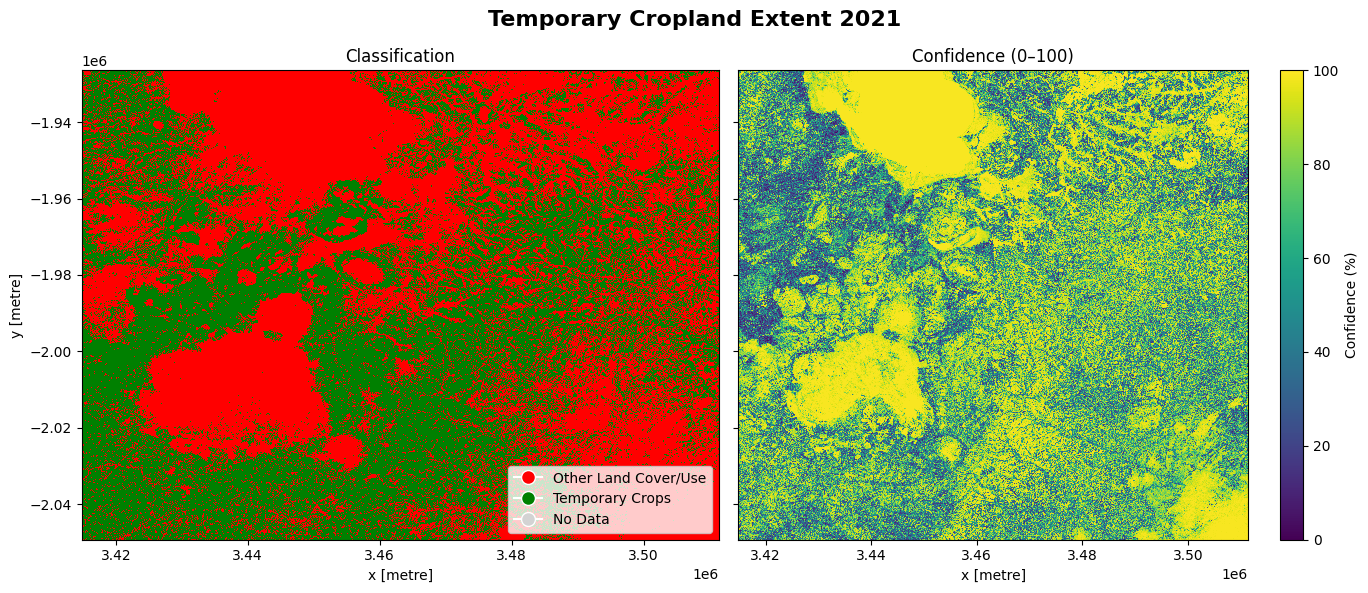

In [6]:
classification = esa_worldcereal_temporarycrops.isel(time=-1)['classification']
confidence = esa_worldcereal_temporarycrops.isel(time=-1)['confidence']

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot 1: Binary Map
cmap_binary = mcolors.ListedColormap(['red', 'green', 'lightgray'])
bounds_binary = [-50, 50, 150, 300]  # Class boundaries
norm_binary = mcolors.BoundaryNorm(bounds_binary, cmap_binary.N)

im1 = classification.plot.imshow(
    ax=ax1, cmap=cmap_binary, norm=norm_binary, add_colorbar=False
)
ax1.set_title('Classification')
ax1.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Other Land Cover/Use', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Temporary Crops', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='No Data', markerfacecolor='lightgray', markersize=10)
], loc='lower right')

# Plot 2: Confidence Map
im2 = confidence.plot.imshow(
    ax=ax2, cmap='viridis', vmin=0, vmax=100, cbar_kwargs={'label': 'Confidence (%)'}
)
ax2.set_title('Confidence (0–100)')
ax2.set_ylabel('')

fig.suptitle('Temporary Cropland Extent 2021', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 2. Active Cropland
The cell below demonstrates how to load the dataset using the `esa_worldcereal_activecropland` product code.  Metadata Information can be found [here](https://explorer.digitalearth.africa/products/esa_worldcereal_activecropland). In this case, after reviewing the metadata, we can see that the classification layer is encoded as:

* 0: inactive cropland
* 100: active cropland
* 254: no crop
* 255: no data

The most recent imagery from July 2021 is used in this example. 

In [7]:
#load the data
esa_worldcereal_activecropland = dc.load(product='esa_worldcereal_activecropland',
                                measurements=['classification'],
                                resolution = (-10, 10),
                                time = ('2021'),
                                **query)

esa_worldcereal_activecropland

<xarray.Dataset> Size: 119MB
Dimensions:         (time: 1, y: 12290, x: 9649)
Coordinates:
  * time            (time) datetime64[ns] 8B 2021-07-05T11:59:59.500000
  * y               (y) float64 98kB -1.926e+06 -1.926e+06 ... -2.049e+06
  * x               (x) float64 77kB 3.415e+06 3.415e+06 ... 3.511e+06 3.511e+06
    spatial_ref     int32 4B 6933
Data variables:
    classification  (time, y, x) uint8 119MB 254 254 254 254 ... 254 254 254 254
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

### Visualizing the Results

The distribution of cropland in the default area of interest matches that seen above. In July 2021 (winter in the default area of interest), the majority of cropland is classified as inactive. 

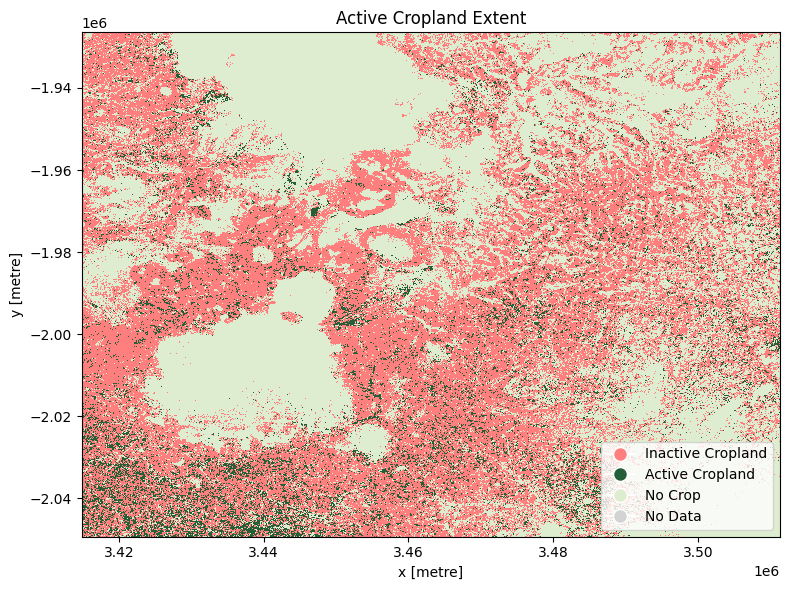

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

cmap_binary = mcolors.ListedColormap(['#FF7F7F', '#255F38', '#DEEDCF', 'lightgray'])
bounds_binary = [-0.5, 50, 150, 254.5, 300] 
norm_binary = mcolors.BoundaryNorm(bounds_binary, cmap_binary.N)

im = esa_worldcereal_activecropland.isel(time=-1)['classification'].plot.imshow(
    ax=ax,
    cmap=cmap_binary,
    norm=norm_binary,
    add_colorbar=False
)

ax.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Inactive Cropland', markerfacecolor='#FF7F7F', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Active Cropland', markerfacecolor='#255F38', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='No Crop', markerfacecolor='#DEEDCF', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='No Data', markerfacecolor='lightgray', markersize=10)
], loc='lower right')


ax.set_title('Active Cropland Extent')

plt.tight_layout()
plt.show()

### 3.  Active Cropland during the Maize Season

The cell below demonstrates how to load the dataset using the `esa_worldcereal_maize_active` product code. Metadata information can be found [here](https://explorer.digitalearth.africa/products/esa_worldcereal_maize_active). The product is defined as an active _cropland_ map for the main maize season defined in a region. We can therefore interpret the active cropland classification as referring to all active crops, not just maize.

After reviewing the metadata, we can see that the active maive product is encoded as:

* 0: inactive cropland
* 100: active cropland
* 254: no crop
* 255: no data

The most recent imagery from January 2021 is used in this example. 

In [9]:
#load the data
esa_worldcereal_maize_active = dc.load(product='esa_worldcereal_maize_active',
                                measurements=['classification'],
                                resolution = (-10, 10),
                                time = ('2021-06'),
                                **query)

esa_worldcereal_maize_active

<xarray.Dataset> Size: 119MB
Dimensions:         (time: 1, y: 12290, x: 9649)
Coordinates:
  * time            (time) datetime64[ns] 8B 2021-01-20T11:59:59.500000
  * y               (y) float64 98kB -1.926e+06 -1.926e+06 ... -2.049e+06
  * x               (x) float64 77kB 3.415e+06 3.415e+06 ... 3.511e+06 3.511e+06
    spatial_ref     int32 4B 6933
Data variables:
    classification  (time, y, x) uint8 119MB 254 254 254 254 ... 254 254 254 254
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

### Visualizing the Results

In January 2021, it appears that much of the cropland was active.

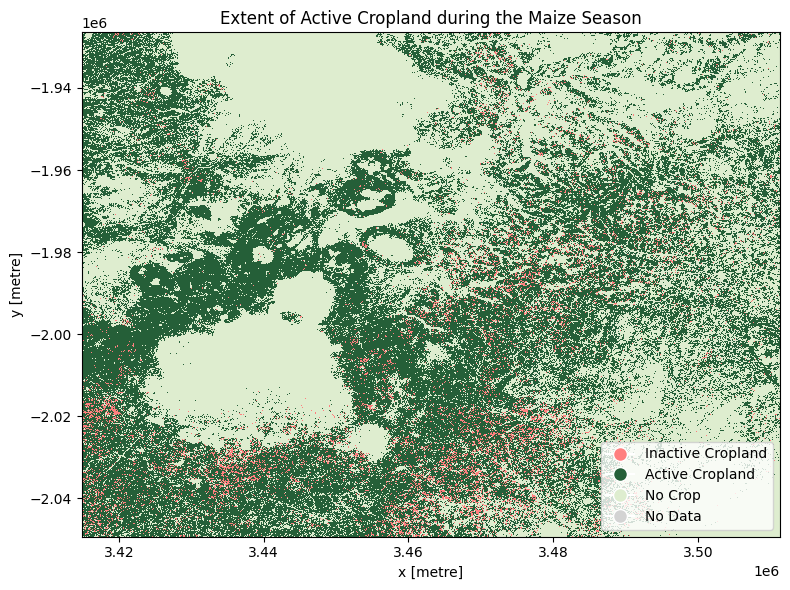

In [10]:
# Plot the xarray DataArray with custom colormap
fig, ax = plt.subplots(figsize=(8, 6))

cmap_binary = mcolors.ListedColormap(['#FF7F7F', '#255F38', '#DEEDCF', 'lightgray'])
bounds_binary = [-0.5, 50, 150, 254.5, 300] 
norm_binary = mcolors.BoundaryNorm(bounds_binary, cmap_binary.N)

im = esa_worldcereal_maize_active.isel(time=-1)['classification'].plot.imshow(
    ax=ax,
    cmap=cmap_binary,
    norm=norm_binary,
    add_colorbar=False
)

# Custom colorbar setup with boundaries
ax.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Inactive Cropland', markerfacecolor='#FF7F7F', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Active Cropland', markerfacecolor='#255F38', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='No Crop', markerfacecolor='#DEEDCF', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='No Data', markerfacecolor='lightgray', markersize=10)
], loc='lower right')

ax.set_title('Extent of Active Cropland during the Maize Season')

plt.tight_layout()
plt.show()

### 4. Main-Season Maize Cropland

The cell below demonstrates how to load the dataset using the `esa_worldcereal_maize_main` product code. This product refers to a _maize_ crop map for the main maize season defined in a region. We can therefore interpret the map as relating to maize crops only. Metadata information can be found [here](https://explorer.digitalearth.africa/products/esa_worldcereal_maize_main). 

* 0: inactive cropland non-maize
* 100: active cropland maize
* 254: no crop
* 255: no data

The most recent imagery from January 2021 is used in this example.

In [11]:
#load the data
esa_worldcereal_maize_main = dc.load(product='esa_worldcereal_maize_main',
                                measurements=['classification','confidence'],
                                resolution = (-10, 10),
                                time = ('2021'),
                                **query)

esa_worldcereal_maize_main

<xarray.Dataset> Size: 237MB
Dimensions:         (time: 1, y: 12290, x: 9649)
Coordinates:
  * time            (time) datetime64[ns] 8B 2021-01-20T11:59:59.500000
  * y               (y) float64 98kB -1.926e+06 -1.926e+06 ... -2.049e+06
  * x               (x) float64 77kB 3.415e+06 3.415e+06 ... 3.511e+06 3.511e+06
    spatial_ref     int32 4B 6933
Data variables:
    classification  (time, y, x) uint8 119MB 254 254 254 254 ... 254 254 254 254
    confidence      (time, y, x) uint8 119MB 247 247 247 247 ... 254 254 254 254
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

### Visualizing the Results

We can see that maize makes up a large proportion of active cropland, shown above, for the main maize season. We might assume that the remainder of active cropland that is not maize could be planted to other summer crops. We could combine this `esa_worldcereal_maize_main` product with the `esa_worldcereal_maize_active` product to determine which areas are active and not maize.

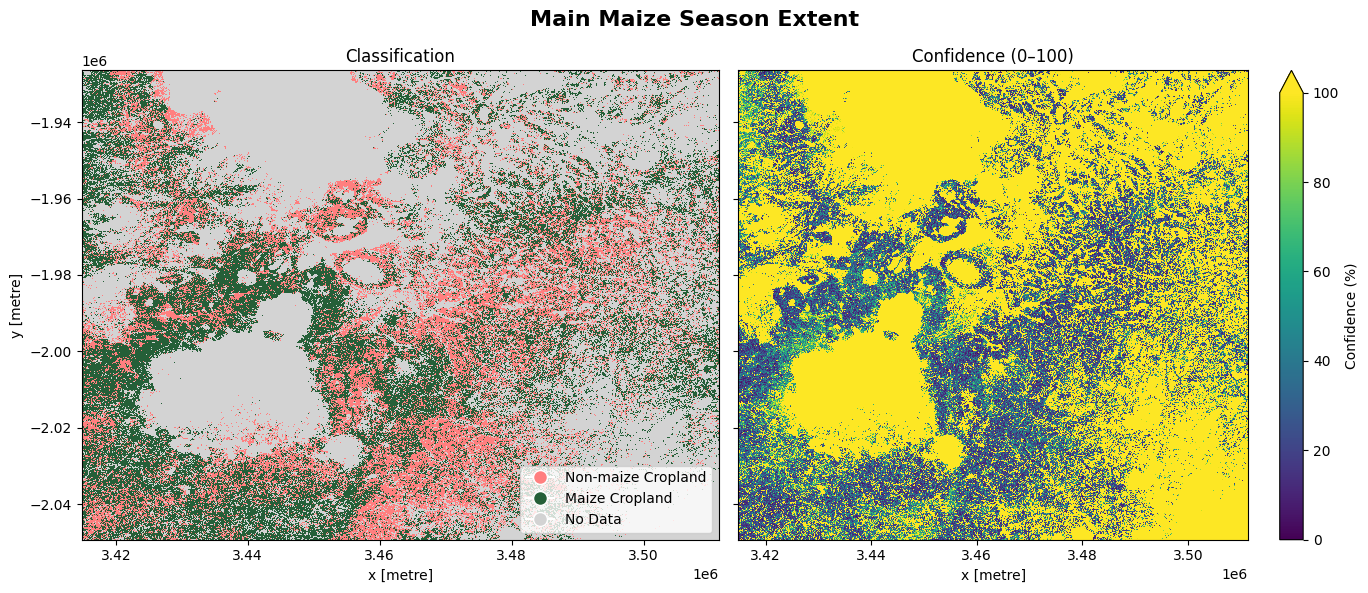

In [12]:
classification = esa_worldcereal_maize_main.isel(time=-1)['classification']
confidence = esa_worldcereal_maize_main.isel(time=-1)['confidence']

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot 1: Binary Map
cmap_binary = mcolors.ListedColormap(['#FF7F7F', '#255F38', 'lightgray'])
bounds_binary = [-50, 50, 150, 255]  # Class boundaries
norm_binary = mcolors.BoundaryNorm(bounds_binary, cmap_binary.N)

im1 = classification.plot.imshow(
    ax=ax1, cmap=cmap_binary, norm=norm_binary, add_colorbar=False
)
ax1.set_title('Classification')
ax1.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Non-maize Cropland', markerfacecolor='#FF7F7F', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Maize Cropland', markerfacecolor='#255F38', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='No Data', markerfacecolor='lightgray', markersize=10)
], loc='lower right')

# Plot 2: Confidence Map
im2 = confidence.plot.imshow(
    ax=ax2, cmap='viridis', vmin=0, vmax=100, cbar_kwargs={'label': 'Confidence (%)'}
)
ax2.set_title('Confidence (0–100)')
ax2.set_ylabel('')

fig.suptitle('Main Maize Season Extent', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

### 5. Spatial Extent of Irrigated Cropland during the Maize Season

The cell below demonstrates how to load the dataset using the `esa_worldcereal_maize_irrigation` product code. Metadata information can be found [here](https://explorer.digitalearth.africa/products/esa_worldcereal_maize_irrigation). The most recent imagery is used in this example. The product is specifically designed to capture _all_ active crops under both rainfed and irrigated conditions grown in the main maize season. Below are the attributes of the product:

* 0: Rainfed → areas where crops rely only on precipitation for growth.
* 100: Irrigated  → areas where crops are grown with supplementary irrigation.
* 254: no crop
* 255: no data
* 
The most recent imagery from January 2021 is used in this example.

In [13]:
#load the data
esa_worldcereal_maize_irrigation = dc.load(product='esa_worldcereal_maize_irrigation',
                                measurements=['classification','confidence'],
                                resolution = (-10, 10),
                                time = ('2021'),
                                **query)

esa_worldcereal_maize_irrigation

<xarray.Dataset> Size: 237MB
Dimensions:         (time: 1, y: 12290, x: 9649)
Coordinates:
  * time            (time) datetime64[ns] 8B 2021-01-20T11:59:59.500000
  * y               (y) float64 98kB -1.926e+06 -1.926e+06 ... -2.049e+06
  * x               (x) float64 77kB 3.415e+06 3.415e+06 ... 3.511e+06 3.511e+06
    spatial_ref     int32 4B 6933
Data variables:
    classification  (time, y, x) uint8 119MB 254 254 254 254 ... 254 254 254 254
    confidence      (time, y, x) uint8 119MB 248 248 248 248 ... 254 254 254 254
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

### Visualizing the Results

The image below shows active cropland that was irrigated in the maize season as well as those that were rainfed. The confidence map provides assurance to justify the output, based on a scale ranging from 0 to 100%

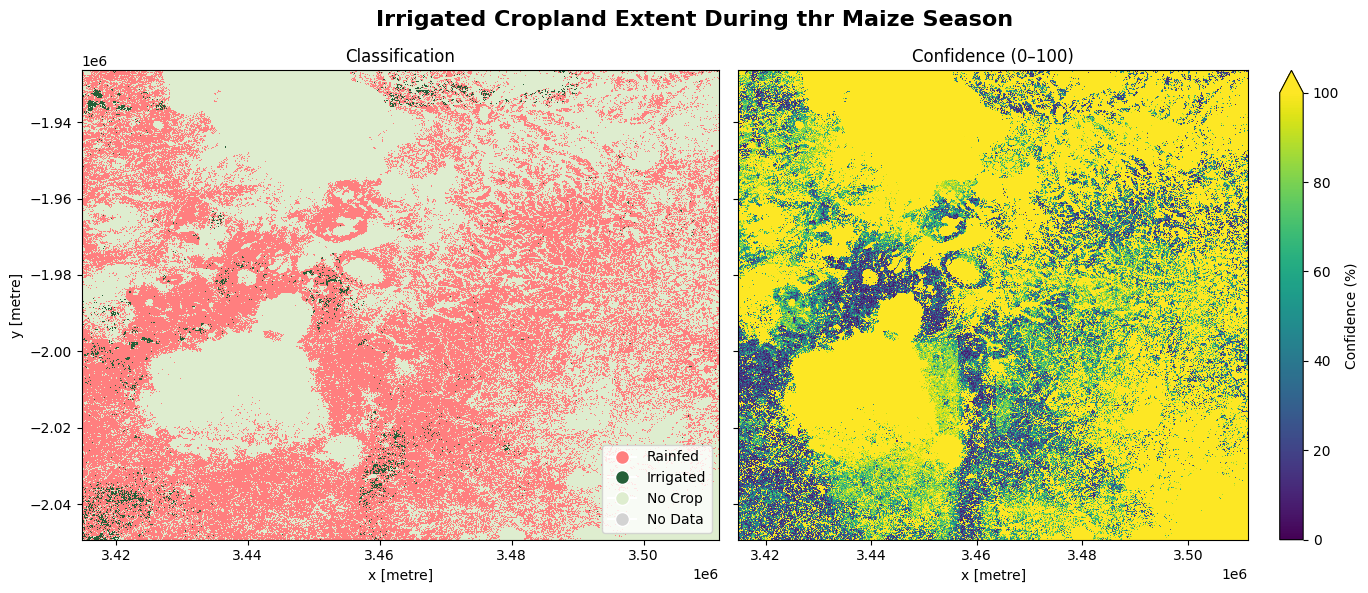

In [14]:
classification = esa_worldcereal_maize_irrigation.isel(time=-1)['classification']
confidence = esa_worldcereal_maize_irrigation.isel(time=-1)['confidence']

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot 1: Binary Map
cmap_binary = mcolors.ListedColormap(['#FF7F7F', '#255F38', '#DEEDCF', 'lightgray'])
bounds_binary = [-0.5, 50, 150, 254.5, 300] 
norm_binary = mcolors.BoundaryNorm(bounds_binary, cmap_binary.N)

im1 = classification.plot.imshow(
    ax=ax1, cmap=cmap_binary, norm=norm_binary, add_colorbar=False
)
ax1.set_title('Classification')
ax1.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Rainfed', markerfacecolor='#FF7F7F', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Irrigated', markerfacecolor='#255F38', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='No Crop', markerfacecolor='#DEEDCF', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='No Data', markerfacecolor='lightgray', markersize=10)
], loc='lower right')

# Plot 2: Confidence Map
im2 = confidence.plot.imshow(
    ax=ax2, cmap='viridis', vmin=0, vmax=100, cbar_kwargs={'label': 'Confidence (%)'}
)
ax2.set_title('Confidence (0–100)')
ax2.set_ylabel('')

fig.suptitle('Irrigated Cropland Extent During thr Maize Season', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

### 6. Winter Cereal Cropland

The cell below demonstrates how to load the dataset using the esa_worldcereal_wintercereals product code. This product refers to a cereal map for the main cereal season defined in a region. We can therefore interpret the map as relating to cereal crops only. Metadata information can be found [here](https://explorer.digitalearth.africa/products/esa_worldcereal_wintercereals).  Below are the attributes of the product:

* 0: Other Temporary crop
* 100: Winter Cereal
* 254: No Crop
* 255: No Data

The most recent imagery from July 2021 is used in this example.

In [15]:
#load the data
esa_worldcereal_wintercereals = dc.load(product='esa_worldcereal_wintercereals',
                                measurements=['classification','confidence'],
                                resolution = (-10, 10),
                                time = ('2021'),
                                **query)

esa_worldcereal_wintercereals

<xarray.Dataset> Size: 237MB
Dimensions:         (time: 1, y: 12290, x: 9649)
Coordinates:
  * time            (time) datetime64[ns] 8B 2021-07-05T11:59:59.500000
  * y               (y) float64 98kB -1.926e+06 -1.926e+06 ... -2.049e+06
  * x               (x) float64 77kB 3.415e+06 3.415e+06 ... 3.511e+06 3.511e+06
    spatial_ref     int32 4B 6933
Data variables:
    classification  (time, y, x) uint8 119MB 254 254 254 254 ... 254 254 254 254
    confidence      (time, y, x) uint8 119MB 249 249 249 249 ... 254 254 254 254
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

### Visualizing the Results

The image below shows the winter cereals crops and other temporary crops. The confidence map provides assurance to justify the output, based on a scale ranging from 0 to 100%

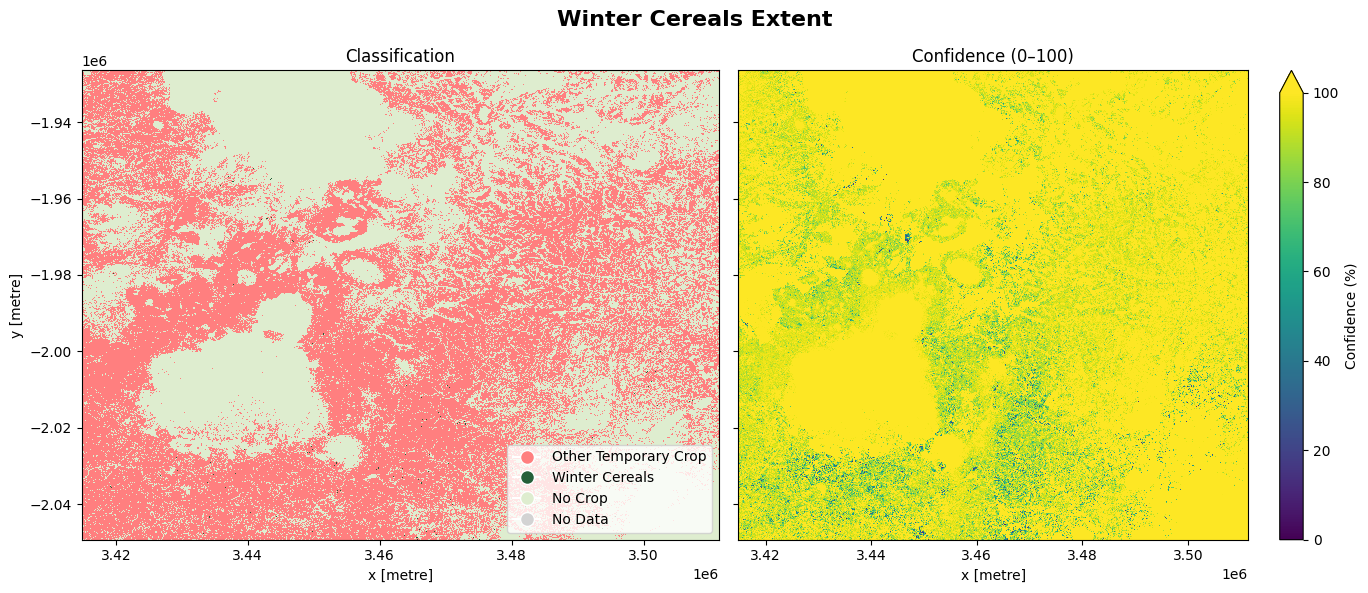

In [16]:
classification = esa_worldcereal_wintercereals.isel(time=-1)['classification']
confidence = esa_worldcereal_wintercereals.isel(time=-1)['confidence']

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot 1: Binary Map
cmap_binary = mcolors.ListedColormap(['#FF7F7F', '#255F38', '#DEEDCF', 'lightgray'])
bounds_binary = [-0.5, 50, 150, 254.5, 300] 
norm_binary = mcolors.BoundaryNorm(bounds_binary, cmap_binary.N)

im1 = classification.plot.imshow(
    ax=ax1, cmap=cmap_binary, norm=norm_binary, add_colorbar=False
)
ax1.set_title('Classification')
ax1.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Other Temporary Crop', markerfacecolor='#FF7F7F', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Winter Cereals', markerfacecolor='#255F38', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='No Crop', markerfacecolor='#DEEDCF', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='No Data', markerfacecolor='lightgray', markersize=10)
], loc='lower right')

# Plot 2: Confidence Map
im2 = confidence.plot.imshow(
    ax=ax2, cmap='viridis', vmin=0, vmax=100, cbar_kwargs={'label': 'Confidence (%)'}
)
ax2.set_title('Confidence (0–100)')
ax2.set_ylabel('')

fig.suptitle('Winter Cereals Extent', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

### 7. Irrigated Main Cereal Cropland

The cell below demonstrates how to load the dataset using the esa_worldcereal_wintercereals_irrigation product code. This product refers to a irrigated cereal map for the irrigated main cereal season defined in a region. We can therefore interpret the map as relating to cereal crops only. Metadata information can be found [here](https://explorer.digitalearth.africa/products/esa_worldcereal_wintercereals_irrigation)..

* 0: Rainfed
* 100: Irrigated
* 254: No crop
* 255: No data

The most recent imagery from January 2021 is used in this example.

In [17]:
#load the data
esa_worldcereal_wintercereals_irrigation = dc.load(product='esa_worldcereal_wintercereals_irrigation',
                                measurements=['classification','confidence'],
                                resolution = (-10, 10),
                                time = ('2021'),
                                **query)

esa_worldcereal_wintercereals_irrigation

<xarray.Dataset> Size: 237MB
Dimensions:         (time: 1, y: 12290, x: 9649)
Coordinates:
  * time            (time) datetime64[ns] 8B 2021-07-05T11:59:59.500000
  * y               (y) float64 98kB -1.926e+06 -1.926e+06 ... -2.049e+06
  * x               (x) float64 77kB 3.415e+06 3.415e+06 ... 3.511e+06 3.511e+06
    spatial_ref     int32 4B 6933
Data variables:
    classification  (time, y, x) uint8 119MB 254 254 254 254 ... 254 254 254 254
    confidence      (time, y, x) uint8 119MB 248 248 248 248 ... 254 254 254 254
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

### Visualizing the Results

The image below shows the cereal farms that were irrigated as well as those that were rainfed. The confidence map provides assurance to justify the output, based on a scale ranging from 0 to 100%

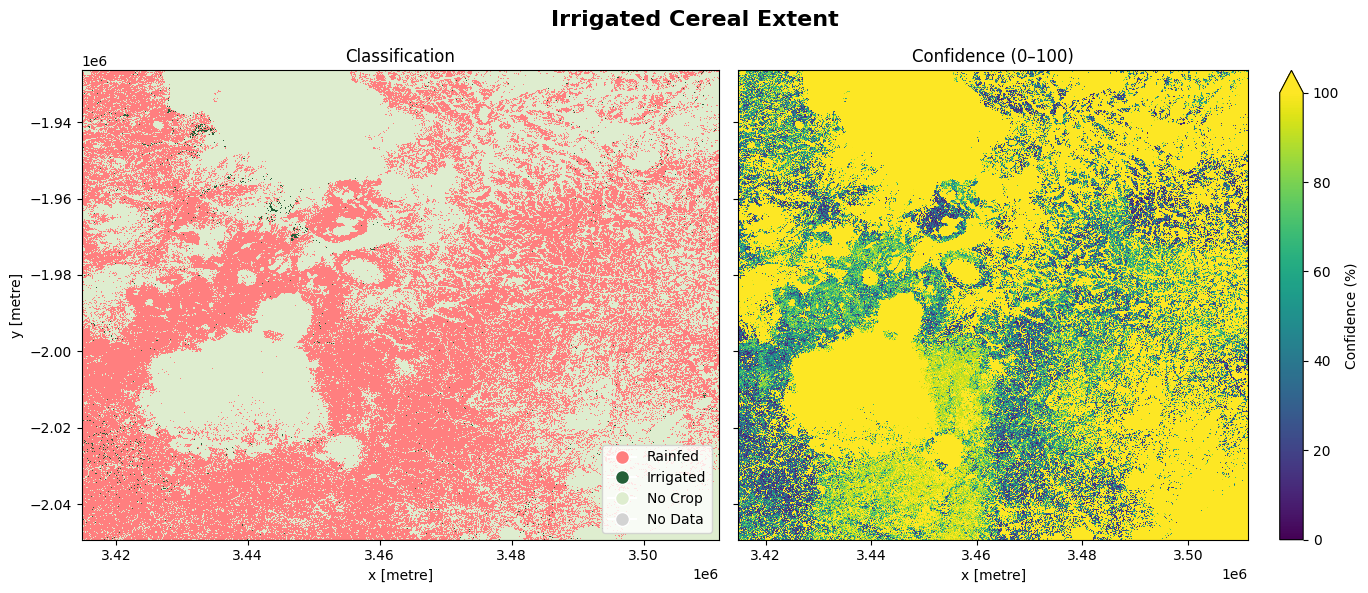

In [18]:
classification = esa_worldcereal_wintercereals_irrigation.isel(time=-1)['classification']
confidence = esa_worldcereal_wintercereals_irrigation.isel(time=-1)['confidence']

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot 1: Binary Map
cmap_binary = mcolors.ListedColormap(['#FF7F7F', '#255F38', '#DEEDCF', 'lightgray'])
bounds_binary = [-0.5, 50, 150, 254.5, 300] 
norm_binary = mcolors.BoundaryNorm(bounds_binary, cmap_binary.N)

im1 = classification.plot.imshow(
    ax=ax1, cmap=cmap_binary, norm=norm_binary, add_colorbar=False
)
ax1.set_title('Classification')
ax1.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Rainfed', markerfacecolor='#FF7F7F', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Irrigated', markerfacecolor='#255F38', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='No Crop', markerfacecolor='#DEEDCF', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='No Data', markerfacecolor='lightgray', markersize=10)
], loc='lower right')

# Plot 2: Confidence Map
im2 = confidence.plot.imshow(
    ax=ax2, cmap='viridis', vmin=0, vmax=100, cbar_kwargs={'label': 'Confidence (%)'}
)
ax2.set_title('Confidence (0–100)')
ax2.set_ylabel('')

fig.suptitle('Irrigated Cereal Extent', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

### Active and Inactive Cropland: Maize Irrigation and Rainfed Patterns

The cell below is designed to prepare and align the three WorldCereal datasets—maize main, maize irrigation, and maize active—so they can be merged without conflicts. It does this by first renaming overlapping variables (e.g., changing "classification" in the maize main dataset to "maize_classification", changing "classification" in the irrigation dataset to "irrigation_classification" and "classification" in the maize active dataset to "active_classification"), which prevents MergeError issues when datasets have the same variable names. It also renames "confidence" in the maize main dataset to "maize_confidence" for clarity. 

Once renamed, the datasets are merged with xr.merge(), producing a single, unified xarray.Dataset (merge_data) that contains all three layers aligned on the same coordinates and dimensions. This combined dataset makes it possible to perform multi-layer queries (e.g., identifying irrigated maize areas with high confidence or distinguishing active vs. inactive cropland), ensuring all variables are accessible in one place for streamlined analysis.

In [19]:
#Renaming variables 
esa_worldcereal_maize_main = esa_worldcereal_maize_main.rename({"classification": "maize_classification", "confidence": "maize_confidence"})
esa_worldcereal_maize_irrigation = esa_worldcereal_maize_irrigation.rename({"classification": "irrigation_classification", "confidence": "irrigation_confidence"})
esa_worldcereal_maize_active = esa_worldcereal_maize_active.rename({"classification": "active_classification"})

#Merging of the maize_main, maize_irrigation and maize_active
merge_data = xr.merge([esa_worldcereal_maize_main, esa_worldcereal_maize_irrigation, esa_worldcereal_maize_active])

#Display the Results
merge_data

<xarray.Dataset> Size: 593MB
Dimensions:                    (time: 1, y: 12290, x: 9649)
Coordinates:
  * time                       (time) datetime64[ns] 8B 2021-01-20T11:59:59.5...
  * y                          (y) float64 98kB -1.926e+06 ... -2.049e+06
  * x                          (x) float64 77kB 3.415e+06 ... 3.511e+06
    spatial_ref                int32 4B 6933
Data variables:
    maize_classification       (time, y, x) uint8 119MB 254 254 254 ... 254 254
    maize_confidence           (time, y, x) uint8 119MB 247 247 247 ... 254 254
    irrigation_classification  (time, y, x) uint8 119MB 254 254 254 ... 254 254
    irrigation_confidence      (time, y, x) uint8 119MB 248 248 248 ... 254 254
    active_classification      (time, y, x) uint8 119MB 254 254 254 ... 254 254
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

### Identifying Cropland Classes

In this section, we use the merged WorldCereal dataset (`merge_data`) to
separate cropland into meaningful categories. By combining information from
the **maize classification**, **irrigation classification**, and **active cropland
classification** layers, we can distinguish between:

- **Active Irrigated Maize**: Pixels classified as maize (`maize_classification = 100`)
  and irrigated (`irrigation_classification = 100`).

- **Active Rainfed Maize**: Pixels classified as maize (`maize_classification = 100`)
  and rainfed (`irrigation_classification = 0`).

- **Active Irrigated Non-Maize**: Pixels classified as non-maize
  (`maize_classification = 0`) but irrigated (`irrigation_classification = 100`).

- **Active Rainfed Non-Maize**: Pixels classified as non-maize
  (`maize_classification = 0`) and rainfed (`irrigation_classification = 0`).

- **Inactive Cropland**: Pixels where cropland was identified
  (`active_classification = 0`), but not active in the season.

Each of these layers is extracted by applying logical conditions with `.where()`
to the merged dataset.


In [20]:
active_irrigated_maize = merge_data.isel(time=-1)['irrigation_classification'].where(
    (merge_data['irrigation_classification'] == 100) & (merge_data['maize_classification'] == 100)
)

active_rainfed_maize = merge_data.isel(time=-1)['irrigation_classification'].where(
    (merge_data['irrigation_classification'] == 0) & (merge_data['maize_classification'] == 100)
)

active_irrigated_non_maize = merge_data.isel(time=-1)['irrigation_classification'].where(
    (merge_data['irrigation_classification'] == 100) & (merge_data['maize_classification'] == 0)
)

active_rainfed_non_maize = merge_data.isel(time=-1)['irrigation_classification'].where(
    (merge_data['irrigation_classification'] == 0) & (merge_data['maize_classification'] == 0)
)

active_inactive_cropland = merge_data.isel(time=-1)['irrigation_classification'].where(
    (merge_data['active_classification'] == 0)
)

### Cropland Category Visualization

In this step, we combine the five derived cropland layers into a single
composite map. Each pixel is assigned a numeric code based on which category
it belongs to:

- **0** → Active Irrigated Maize  
- **1** → Active Rainfed Maize  
- **2** → Active Irrigated Non-Maize  
- **3** → Active Rainfed Non-Maize  
- **4** → Inactive Cropland  

We then apply a custom colormap to display each class in a distinct color:

- Red → Active Irrigated Maize  
- Green → Active Rainfed Maize  
- Blue → Active Irrigated Non-Maize  
- Orange → Active Rainfed Non-Maize  
- Purple → Inactive Cropland  

Finally, we overlay these categories on a single plot with a legend,
providing a clear visual representation of cropland status and water
management practices for maize and other crops.


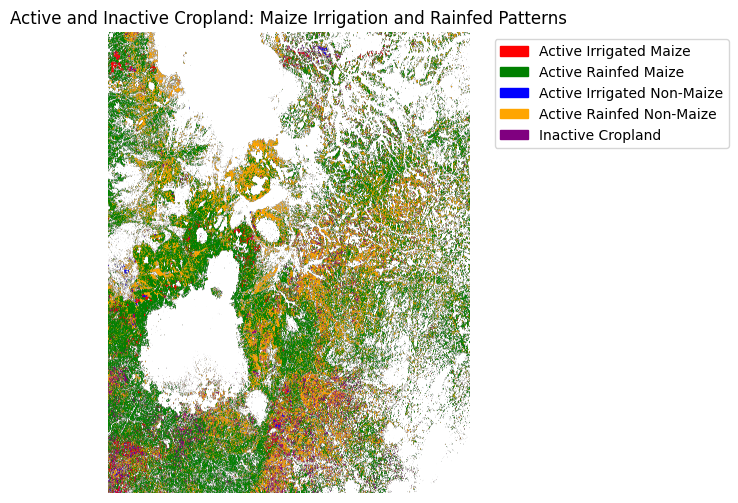

In [21]:
# Create a base canvas using the first layer's shape
shape = active_irrigated_maize.shape
composite = np.full(shape, np.nan)

# Assign numeric codes for each class
composite = np.where(~np.isnan(active_irrigated_maize), 0, composite)
composite = np.where(~np.isnan(active_rainfed_maize), 1, composite)
composite = np.where(~np.isnan(active_irrigated_non_maize), 2, composite)
composite = np.where(~np.isnan(active_rainfed_non_maize), 3, composite)
composite = np.where(~np.isnan(active_inactive_cropland), 4, composite)

# Define colors and labels
colors = ['red', 'green', 'blue', 'orange', 'purple']
labels = [
    'Active Irrigated Maize',
    'Active Rainfed Maize',
    'Active Irrigated Non-Maize',
    'Active Rainfed Non-Maize',
    'Inactive Cropland'
]

cmap = ListedColormap(colors)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(composite, cmap=cmap)

# Build a custom legend
handles = [plt.matplotlib.patches.Patch(color=colors[i], label=labels[i]) for i in range(len(colors))]
ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_title("Active and Inactive Cropland: Maize Irrigation and Rainfed Patterns")
ax.axis('off')

plt.tight_layout()
plt.show()

****
## Conclusion

This notebook demonstrates how to load the WorldCereal dataset in the DE Africa Sandbox. The data can be used to monitor cropland dynamics, detect seasonal changes, and compare agricultural patterns across regions. It can also support the creation of derived datasets to identify cereal and maize crops, helping track productivity trends and inform food security planning.

***
## References

European Space Agency. (2025). Introducing WorldCereal. ESA. https://www.esa.int/Applications/Observing_the_Earth/Introducing_World_Cereal

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [DE Africa Slack channel](https://digitalearthafrica.slack.com/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [22]:
print(datacube.__version__)

1.8.20


**Last tested:**

In [23]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2025-09-23'